In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
data = pd.read_csv("titanic.csv")

<Axes: >

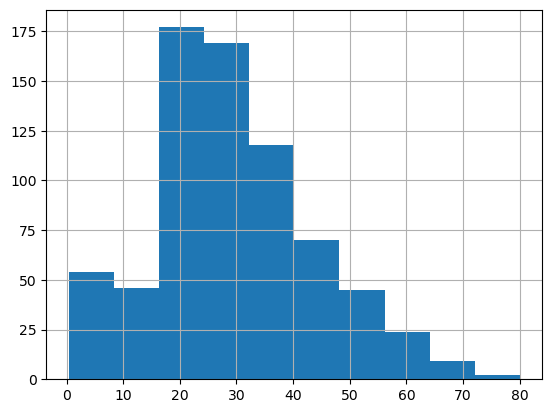

In [ ]:
data['age'].hist()

<Axes: xlabel='sex'>

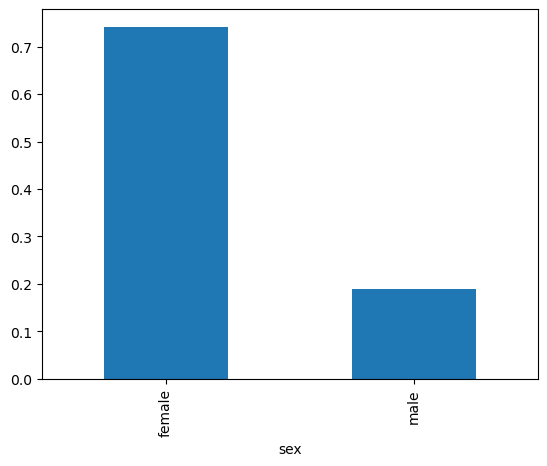

In [ ]:
data.groupby('sex')['survived'].mean().plot(kind='bar')

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_9196\3337432034.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


<Axes: >

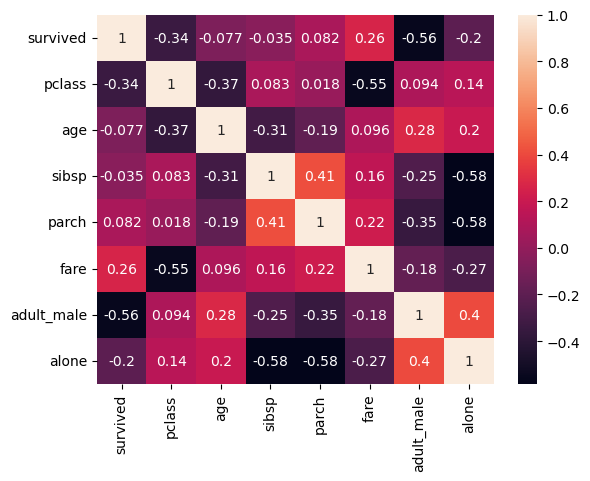

In [ ]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)

In [ ]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data['age'].fillna(data['age'].mean(), inplace=True)

In [ ]:
Q1 = data['fare'].quantile(0.25)
Q3 = data['fare'].quantile(0.75)
IQR = Q3 - Q1
data['fare'] = data['fare'].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR)
data = pd.get_dummies(data, columns=['embarked'])

In [ ]:
X = data.drop('survived', axis=1)
y = data['survived']

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
ct = ColumnTransformer([('scaler', StandardScaler(), ['age', 'fare'])],remainder='passthrough')
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaler', StandardScaler(), ['age', 'fare'])])

In [ ]:
X_scaled = ct.fit_transform(X)
X_scaled

array([[-0.5924805998028931, -0.8205524467753036, 3, ..., 0, 0, 1],
       [0.6387890120425208, 2.0316232164746784, 1, ..., 1, 0, 0],
       [-0.2846631968415396, -0.7875775669667633, 3, ..., 0, 0, 1],
       ...,
       [0.0, -0.029155331370337455, 3, ..., 0, 0, 1],
       [-0.2846631968415396, 0.2908231319569791, 1, ..., 1, 0, 0],
       [0.17706290760049057, -0.7961266098800885, 3, ..., 0, 1, 0]],
      dtype=object)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
X_train
X_test
y_train
y_test

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: survived, Length: 179, dtype: int64